In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
# ignorando alertas (não erros)
warnings.filterwarnings('ignore')

In [48]:
# importando o dataset
df = pd.read_csv('../dataset/data-set-clube-new-v2.csv', sep=';')

In [49]:
# Quantidade de linhas e colunas no dataset (linhas, colunas).
df.shape

(3027, 6)

In [5]:
# conferindo se existe valor nulo no dataset
df.isnull().values.any()

False

In [30]:
# Removendo a coluna id_socio (não usaremos ela por enquanto)
df.drop('id_socio', inplace=True, axis=1)

In [65]:
# Visualizando o padrão e disposição do arquivo csv
df.head(3)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
3024,54449,ATIVO,2,1,0,1
3025,54474,ATIVO,0,1,0,0
3026,49083,ATIVO,51,4,12,15


In [9]:
# Separando o dataset por status = ATIVO ou CANCELADO

socio_ativo = (df['status'] == "ATIVO")
socio_ativo = df[socio_ativo]

socio_cancelado = (df['status'] == "CANCELADO")
socio_cancelado = df[socio_cancelado]

Nos próximos blocos analisaremos as 2 variáveis acima em: desvio padrão, máximo e mínimo,
média, correlação e faremos alguns gráficos para melhor análise.

##### 1 - DESVIO PADRÃO

O desvio padrão mede quão diferente os valores de um conjunto de dados se diferem entre si. Quanto menor o valor e mais próximo de zero, os dados são mais uniformes e semelhantes; quanto maior o valor, mais distantes e diferentes são os valores dos dados.

Abaixo mediremos o desvio padrão dos sócios baseado em seus status.

##### 1.1 - DESVIO PADRÃO STATUS ATIVO

- No resultado abaixo, o desvio padrão que chama a nossa atenção pela variação de valores é o desvio da coluna qtde_frequencia_ano, ou seja, a variedade da frequência dos sócios ativos no ano de 2018 é tão alta (de 0 a 490 como veremos logo abaixo nas variáveis "Máxima"), que o desvio padrão foi de 47. Logo não temos um padrão próximo e uniforme entre os valores dessa coluna, onde ZERO seria o valor de igualdade das variáveis. Em uma análise a respeito desse valor, podemos ver o quão foi variada a frequência dos sócios e seus dependentes no clube.

- A coluna qtde_em_atraso é a coluna que teve uma uniformidade maior em relação as outras colunas para o desvio padrão (mais próximo de zero), diante desse valor, temos uma análise inicial de que os dados dessa coluna giram em torno de um valor próximo a 6, levando em consideração as parcelas em atraso da coluna.

- Os valores das colunas qtde_em_aberto e qtde_em_dia já não são tão uniformes, se distânciando do ponto zero. Porém somente a coluna qtde_em_aberto torna-se um problema para o sócio ativo, quanto maior o valor do desvio, maior foi a variedade, e dependendo da quantidade de parcelas em aberto podemos ter uma alteração de status.

In [52]:
# Desvio padrão ATIVO
socio_ativo.std()

qtde_em_aberto          9.562430
qtde_em_dia             7.601072
qtde_em_atraso          6.239905
qtde_frequencia_ano    47.810617
dtype: float64

##### 1.2 - DESVIO PADRÃO STATUS CANCELADO

- Abaixo temos os menores desvios padrões com as colunas qtde_em_dia e qtde_em_atraso, o valor das duas colunas se aproxima de zero, deixando a sua média em uma uniformidade quase semelhante para todos os valores das colunas.

- Na coluna qtde_frequencia_ano, o desvio padrão apesar de estar alto e não uniforme, nos dá um retorno de uma baixa frequência dos sócios no ano de 2018 se comparado com o desvio padrão do status ATIVO(47).

- A coluna qtde_em_aberto tem uma dispersão de valores que se analisada o seu máximo pode ter sido um fator para a mudança de status para CANCELADO.

In [66]:
# Desvio padrão CANCELADO
socio_cancelado.std()

qtde_em_aberto          8.599585
qtde_em_dia             3.402545
qtde_em_atraso          3.195524
qtde_frequencia_ano    13.317581
dtype: float64

#### 2 - MÁXIMO

##### 2.1 - Máximo sócio Ativo

No resultado de Valores Máximos da nossa base de dados, os valores da tabela abaixo não são necessáriamente do mesmo sócio. Por exemplo: o resultado "qtde_em_aberto" pode ser do sócio de matrícula xxx, o resultado "qtde_frequencia_ano" pode ser do sócio de matrícula yyy e o resultado qtde_frequencia_ano pode ser do sócio de matrícula xyz. Estamos analisando o valor máximo em toda a base de dados.

Abaixo temos os valores máximos de cada coluna referente ao status ATIVO. 
- Devemos destacar que estamos analisando valores referentes ao ano de 2018, onde temos 12 meses. Observamos que o menor valor entre os valores máximos é na coluna qtde_em_atraso = 39. Nesse caso o sócio pagou 39 parcelas após o vencimento de cada uma. Uma análise em relação a essa coluna é que ele tem mais de um título e/ou dependentes, explicando o valor maior que 12 (meses). Podemos aplicar essa análise para a coluna qtde_em_dia = 53, ou seja, o sócio dessa coluna efetuou 53 pagamentos de um título e/ou dependentes em dia.
- Para a coluna qtde_em_aberto = 55, significa que na nossa análise referente ao ano de 2018, esse sócio iniciou o ano de 2019 com 55 parcelas em aberto, porém continua com o status ATIVO, mesmo com o débito nas parcelas. Para uma melhor análise referente a situação atual desse sócio em específico, a base de dados de 2019 será a forma mais assertiva para a resposta, assim saberemos principalmente o status que ele se encontra (ATIVO ou CANCELADO).
- Na coluna qtde_frequencia_ano = 490 nos dá a visão que houve várias entradas no mesmo dia, se analisarmos a quantidade de dias que tem em um ano (365). Provavelmente esse sócio tem o hábito de ir para o clube em diferentes horários no mesmo dia, ou a quantidade de entradas de dependentes relacionados a sua matrícula.

In [17]:
# Máximo sócio Ativo
socio_ativo.max()

status                 ATIVO
qtde_em_aberto            55
qtde_em_dia               53
qtde_em_atraso            39
qtde_frequencia_ano      490
dtype: object

##### 2.2 - Máximo sócio CANCELADO

No resultado de Valores Máximos da nossa base de dados, os valores da tabela abaixo não são necessáriamente do mesmo sócio. Por exemplo: o resultado "qtde_em_aberto" pode ser do sócio de matrícula xxx, o resultado "qtde_frequencia_ano" pode ser do sócio de matrícula yyy e o resultado qtde_frequencia_ano pode ser do sócio de matrícula xyz. Estamos analisando o valor máximo em toda a base de dados.

Abaixo temos os valores máximos de cada coluna referente ao status CANCELADO. 
- Devemos destacar que estamos analisando valores referentes ao ano de 2018, onde temos 12 meses. Observamos que o menor valor entre os valores máximos está na coluna qtde_em_dia e na coluna qtde_em_atraso = 24. Nesse caso um sócio pagou 24 parcelas após o vencimento de cada uma (quantidade que pode levar o sócio a analisar sobre a data de vencimento da parcela por motivos financeiros ou data ruim do mês) e outro sócio (talvez o mesmo) pagou 24 parcelas em dia. Uma análise em relação a essas duas colunas é que os sócios tem mais de um título e/ou dependentes, explicando o valor maior que 12 (meses).
- Para a coluna qtde_em_aberto = 48, significa que na nossa análise referente ao ano de 2018, esse sócio não faz mais parte do quadro de sócios do clube no ano de 2019, com 48 parcelas em aberto e status CANCELADO. Aqui está o nosso ponto central de toda a análise e projeto: o sócio com status CANCELADO. "O que fez ele cancelar?" "Quais os motivos?" "O que poderia ser feito para impedirmos esse cancelamento?". O primeiro motivo que nos faz pensar nesse cancelamento é a quantidade de parcelas em aberto: 48 parcelas, pois somando 48 x (o valor unitário de cada parcela) pode ter sido o motivo chave para essa desistência. Não podemos atribuir o cancelamento SOMENTE a análise dessa coluna, ela pode ser o único motivo da desistência OU apenas um dos fatores que levaram a esse cancelamento.
- Na coluna qtde_frequencia_ano = 217 nos dá a visão que esse sócio teve uma frequência regular no clube no ano de 2018, caso tenha dependentes e tenha sido feito o uso de convites, a frequência do sócio (indivíduo titular) cai referente a esse valor (217). Porém nesse momento não podemos atribuir o status CANCELADO.

In [18]:
# Máximo sócio CANCELADO
socio_cancelado.max()

status                 CANCELADO
qtde_em_aberto                48
qtde_em_dia                   24
qtde_em_atraso                24
qtde_frequencia_ano          217
dtype: object

##### 3 - MÍNIMO

##### 3.1 - Mínimo sócio Ativo

No resultado de Valores Mínimos da nossa base de dados, os valores da tabela abaixo não são necessáriamente do mesmo sócio. Por exemplo: o resultado "qtde_em_aberto" pode ser do sócio de matrícula xxx, o resultado "qtde_frequencia_ano" pode ser do sócio de matrícula yyy e o resultado qtde_frequencia_ano pode ser do sócio de matrícula xyz. Estamos analisando o valor máximo em toda a base de dados.

Nessa análise temos alguns pontos positivos e alguns pontos negativos: 

Positivos: 
- Estamos analisando o valor mínimo de cada coluna para os sócios ATIVOS, logo a coluna qtde_em_aberto = 0 é um ponto positivo para o sócio que passou do ano de 2018 para 2019 com essa coluna com valor = 0, ele é um sócio adimplente. 
- O mesmo vale para o sócio que teve essa virada de ano com a coluna qtde_em_atraso = 0, ou seja, todos os seus pagamentos referentes ao ano de 2018 foram efetuados em dia e seu status está Ativo.

Negativos:
- Para a coluna qtde_em_dia = 0 significa que esse sócio passou de 2018 para 2019 com no mínimo 12 parcelas pagas em atraso (se considerarmos que ele tenha só 1 mensalidade para pagar por mês e tenha efetuado o pagamento de todas) e status ATIVO, nesse caso esse sócio pode mudar de idéia em relação a quantidade de pagamentos em atraso e efetuar o cancelamento, aqui entramos em um ponto importante da previsão do clube: entrar em contato com o sócio e descobrir a melhor forma para não perder esse status ATIVO. 
- A coluna qtde_frequencia_ano = 0. Nesse caso surgiu uma dúvida: é possível um sócio ser somente acionista e não ter necessidade alguma de ir ao clube? Dessa forma obter somente ações e motivos para continuar com o status ATIVO?



In [15]:
# Mínimo sócio Ativo
socio_ativo.min()

status                 ATIVO
qtde_em_aberto             0
qtde_em_dia                0
qtde_em_atraso             0
qtde_frequencia_ano        0
dtype: object

##### 3.2 - Mínimo sócio CANCELADO

No resultado de Valores Mínimos da nossa base de dados, os valores da tabela abaixo não são necessáriamente do mesmo sócio. Por exemplo: o resultado "qtde_em_aberto" pode ser do sócio de matrícula xxx, o resultado "qtde_frequencia_ano" pode ser do sócio de matrícula yyy e o resultado qtde_frequencia_ano pode ser do sócio de matrícula xyz. Estamos analisando o valor máximo em toda a base de dados.

Nessa análise temos alguns pontos positivos e alguns pontos negativos: 

Positivos: 
- Estamos analisando o valor mínimo de cada coluna para os sócios CANCELADOS, logo a coluna qtde_em_aberto = 0 seria em outras condições um ponto positivo para o sócio. Porém nesse caso mesmo com essa coluna com um valor positivo para o sócio, ele chegou em 2019 com o status CANCELADO, com a análise dessa coluna ele seria um sócio adimplente. 

Negativos:
- O sócio que teve a virada de ano com a coluna qtde_em_atraso = 0, ou seja, todos os seus pagamentos referentes ao ano de 2018 foram efetuados em dia ou por outro lado ele não efetuou nenhum pagamento após seu vencimento, deixando assim parcelas em aberto para 2019 e sua matrícula cancelada em algum momento desse período.
- Para a coluna qtde_em_dia = 0 significa que esse sócio passou de 2018 para 2019 com no mínimo 12 parcelas pagas em atraso (se considerarmos que ele tenha só 1 mensalidade para pagar por mês e tenha efetuado o pagamento de todas) e status CANCELADO, nesse caso esse sócio pode ter mudado de idéia em relação a quantidade de pagamentos em atraso e efetuou o cancelamento.
- A coluna qtde_frequencia_ano = 0. A coluna com o valor 0 pode ter sido o ponto principal para o sócio cancelar sua matrícula, principalmente se as mensalidades estivessem em dia, após não ter frequência alguma no clube, deixou de ser interessante ser sócio. Vale uma análise para esse perfil de sócio, que em um primeiro momento tem interesse no clube, porém a sua frequência é nula.



In [21]:
# Mínimo sócio Cancelado
socio_cancelado.min()

status                 CANCELADO
qtde_em_aberto                 0
qtde_em_dia                    0
qtde_em_atraso                 0
qtde_frequencia_ano            0
dtype: object

##### 4 - MÉDIA

##### 4.1 - Média sócio Ativo

No resultado de Médias da nossa base de dados, os valores da tabela abaixo correspondem a média de todos os associados com o status ATIVO. Então a nossa análise foi feita com base em todos os sócios dentro desse perfil.

Na Análise abaixo temos as médias dos sócios com status ATIVO. 

- Podemos analisar em destaque a média da coluna qtde_frequencia_ano = 21, o que mostra que sócios ativos tiveram a média de quase 2 frequências por mês no ano de 2018 (ou pelo menos dependentes dessa matrícula). Esse é um fator que podemos levar em consideração para o status do sócio continuar ATIVO em 2019.

- O resultado para a média de parcelas pagas em atraso (qtde_em_atraso = 3.9) é uma média baixa, se analisarmos pelo fato de que o sócio pode ter pago um dia após o seu vencimento.

- O valor da coluna qtde_em_aberto chama atenção pelo valor 7,4. O sócio mesmo com o status ATIVO inicia o ano com uma média 7 para colocar todos os débitos em dia.

In [23]:
# Média sócio Ativo
socio_ativo.mean()

qtde_em_aberto          7.483156
qtde_em_dia             5.438830
qtde_em_atraso          3.946809
qtde_frequencia_ano    21.666667
dtype: float64

##### 4.2 - Média sócio Cancelado

No resultado de Médias da nossa base de dados, os valores da tabela abaixo correspondem a média de todos os associados com o status CANCELADO. Então a nossa análise foi feita com base em todos os sócios dentro desse perfil.

Na Análise abaixo temos as médias dos sócios com status CANCELADO.  

- Podemos analisar em destaque a média da coluna qtde_em_aberto = 19, o que mostra um valor alto para uma média anual entre os sócios com status CANCELADO, provavelmente a quantidade de parcelas em aberto (somado com o valor unitário de cada uma) junto com a coluna qtde_frequencia_ano = 2(1x por semestre) foi um fator importante para esse sócio não continuar como ATIVO no ano de 2019.

- Podemos somar também para esse perfil de CANCELADOS a média de parcelas pagas em dia = 1, o que deixa a entender que a maior parte das parcelas ficaram em aberto.

- A coluna qtde_em_atraso apresentou uma média baixa, o que analisado por esse ponto de vista (CANCELADO) não influenciou na desistência do sócio.

In [114]:
# Média sócio Cancelado
socio_cancelado.mean()

qtde_em_aberto         19.725032
qtde_em_dia             1.308690
qtde_em_atraso          1.064851
qtde_frequencia_ano     2.741894
dtype: float64

##### 5 - CORRELAÇÃO

Identificando a correlação entre as variáveis. Correlação não implica causalidade, ou seja, um resultado não quer dizer que foi relativo ao correlação entre duas variáveis.
Abaixo teremos o coeficiente de correlação entre as nossas colunas, onde o valor varia de -1 (menos um) até 1 (um).
Cada valor é repersentado pelo seguinte significado:
   
- +1 = forte correlação positiva
-  0 = não há correlação
- -1 forte correlação negativa

Nenhumas das colunas obteve o valor 0(zero), logo, nenhum dos resultados ficou sem correlação.

- Positivo 
Abaixo podemos ver que a melhor correlação  está entre as variáveis: qtde_em_dia/qtde_frequencia_ano (0.402164)
e qtde_frequencia_ano/qtde_em_atraso (0.236802).

Ou seja, podemos partir pelo ponto que o sócio que tem mais mensalidades pagas de qualquer forma (em dia ou em atraso) tem também uma boa frequência no clube (ou pelo menos os seus dependentes).

- Negativo
Podemos ver também que a maior correlação inversamente proporcional(tendo como base -1 como "forte correlação NEGATIVA") está entre as variáveis: qtde_em_dia/qtde_em_aberto (-0.377307) e qtde_em_atraso/qtde_em_aberto (-0.222397).

Ou seja, o sócio que tem uma alta taxa de quantidades de mensalidades em aberto vai contra a porcentagem de parcelas pagas em dia e em atraso, entrando para o quadro de status CANCELADO.

In [25]:
def plot_corr(df, size=6):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
df.corr()

,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
qtde_em_aberto,1.000000,-0.377307,-0.222397,-0.135453
qtde_em_dia,-0.377307,1.000000,0.221493,0.402164
qtde_em_atraso,-0.222397,0.221493,1.000000,0.236802
qtde_frequencia_ano,-0.135453,0.402164,0.236802,1.000000


#### 6- Gráficos 

#### 6.1 - Histograma

- Para a análise dos gráficos de Histograma, foram colocadas analisadas 2 variáveis: Ativos maiores que 0 e Cancelados maiores que 0. Dessa forma teremos uma visão de todos os associados do ano de 2018 que passaram para 2019 com parcelas em aberto juntamente com o seu status.

#### 6.1.1 - Histograma da Quantidade de Movimentos em Aberto por Status

- No gráfico abaixo no primeiro momento da nossa análise, descobrimos que 758 sócios com status Cancelados estavam com movimentos em aberto.

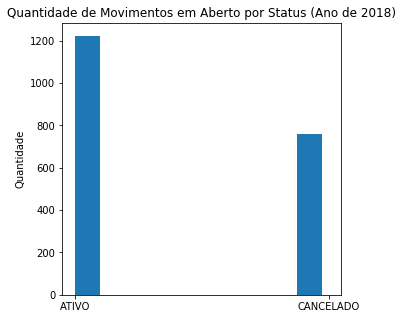

Quantidade Status Ativo: 1222
Quantidade Status Cancelado: 758


In [93]:
# Filtrando dados pela coluna Status - Ativo
dataQtdeAbertoAtivo = (df['status'] == 'ATIVO') 
dataQtdeAbertoAtivo = df[dataQtdeAbertoAtivo]

# Filtrando dados pela coluna Status - Cancelado
dataQtdeAbertoCancelado = (df['status'] == 'CANCELADO') 
dataQtdeAbertoCancelado = df[dataQtdeAbertoCancelado]
    
# Criando um novo DataFrame com a primeira coluna "ativo"
dfQtdeAbertoAtivo = pd.DataFrame()
dfQtdeAbertoAtivo['ativo'] = dataQtdeAbertoAtivo['status']

# Criando um novo DataFrame com a segunda coluna "cancelado"
dfQtdeAbertoCancelado = pd.DataFrame()
dfQtdeAbertoCancelado['cancelado'] = dataQtdeAbertoCancelado['status']

# Criando uma lista para usar no preenchimento do Histograma
listaStatusQtdeAberto = []
# Buscando apenas os status Ativos com quantidade em aberto maior que zero
statusAtivoQtdeAberto = dfQtdeAbertoAtivo[(dataQtdeAbertoAtivo.qtde_em_aberto > 0)]
# Buscando apenas os status Cancelado com quantidade em aberto maior que zero 
statusCanceladoQtdeAberto = dfQtdeAbertoCancelado[(dataQtdeAbertoCancelado.qtde_em_aberto > 0)]

# Populando a lista com os status Ativos 
for index, row in statusAtivoQtdeAberto.iterrows():
    listaStatusQtdeAberto.append(row['ativo'])
    
# Populando a lista com os status Cancelados
for index, row in statusCanceladoQtdeAberto.iterrows():
    listaStatusQtdeAberto.append(row['cancelado'])

# tamanho do Gráfico (largura, altura)
plt.figure(figsize=(5, 5))
# criando o histograma (lista de valores, posicionamento das colunas, largura das colunas)
plt.hist(listaStatusQtdeAberto, bins=8, width=0.1)
# Título do Histograma
plt.title('Quantidade de Movimentos em Aberto por Status (Ano de 2018)')
# Legenda do eixo Y
plt.ylabel('Quantidade')
# Mostrando o gráfico Histograma
plt.show()

print('Quantidade Status Ativo: %s' % len(statusAtivoQtdeAberto))
print('Quantidade Status Cancelado: %s' % len(statusCanceladoQtdeAberto))

#### 6.1.2 - Histograma da Quantidade de Movimentos pagos em dia por Status

- No gráfico abaixo no primeiro momento da nossa análise, podemos ver uma grande diferença entre os sócios com pagamentos em dia filtrados pelo status.

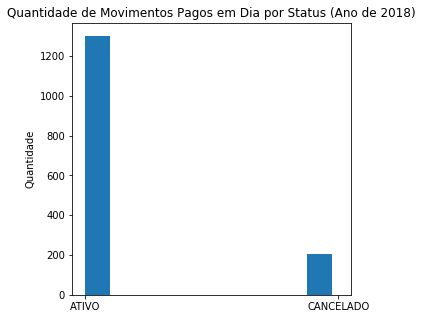

Quantidade Status Ativo: 1300
Quantidade Status Cancelado: 203


In [94]:
# Filtrando dados pela coluna Status - Ativo
dataQtdeDiaAtivo = (df['status'] == 'ATIVO') 
dataQtdeDiaAtivo = df[dataQtdeDiaAtivo]

# Filtrando dados pela coluna Status - Cancelado
dataQtdeDiaCancelado = (df['status'] == 'CANCELADO') 
dataQtdeDiaCancelado = df[dataQtdeDiaCancelado]
    
# Criando um novo DataFrame com a primeira coluna "ativo"
dfQtdeDiaAtivo = pd.DataFrame()
dfQtdeDiaAtivo['ativo'] = dataQtdeDiaAtivo['status']

# Criando um novo DataFrame com a segunda coluna "cancelado"
dfQtdeDiaCancelado = pd.DataFrame()
dfQtdeDiaCancelado['cancelado'] = dataQtdeDiaCancelado['status']

# Criando uma lista para usar no preenchimento do Histograma
listaStatusQtdeDia = []
# Buscando apenas os status Ativos com quantidade em aberto maior que zero
statusAtivoDia = dfQtdeDiaAtivo[(dataQtdeDiaAtivo.qtde_em_dia > 0)]
# Buscando apenas os status Cancelado com quantidade em aberto maior que zero 
statusCanceladoDia = dfQtdeDiaCancelado[(dataQtdeDiaCancelado.qtde_em_dia > 0)]

# Populando a lista com os status Ativos 
for index, row in statusAtivoDia.iterrows():
    listaStatusQtdeDia.append(row['ativo'])
    
# Populando a lista com os status Cancelados
for index, row in statusCanceladoDia.iterrows():
    listaStatusQtdeDia.append(row['cancelado'])

# tamanho do Gráfico (largura, altura)
plt.figure(figsize=(5, 5))
# criando o histograma (lista de valores, posicionamento das colunas, largura das colunas)
plt.hist(listaStatusQtdeDia, bins=8, width=0.1)
# Título do Histograma
plt.title('Quantidade de Movimentos Pagos em Dia por Status (Ano de 2018)')
# Legenda do eixo Y
plt.ylabel('Quantidade')
# Mostrando o gráfico Histograma
plt.show()

print('Quantidade Status Ativo: %s' % len(statusAtivoDia))
print('Quantidade Status Cancelado: %s' % len(statusCanceladoDia))

#### 6.1.3 - Histograma da Quantidade de Movimentos Pagos em Atraso por Status

- Novamente, como no gráfico anterior, podemos ver uma grande diferença entre os sócios com pagamentos em dia filtrados pelo status.

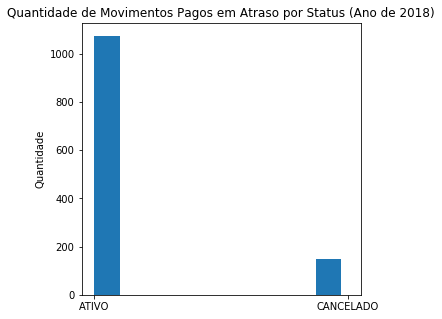

Quantidade Status Ativo: 1073
Quantidade Status Cancelado: 149


In [95]:
# Filtrando dados pela coluna Status - Ativo
dataQtdeAtrasoAtivo = (df['status'] == 'ATIVO') 
dataQtdeAtrasoAtivo = df[dataQtdeAtrasoAtivo]

# Filtrando dados pela coluna Status - Cancelado
dataQtdeAtrasoCancelado = (df['status'] == 'CANCELADO') 
dataQtdeAtrasoCancelado = df[dataQtdeAtrasoCancelado]
    
# Criando um novo DataFrame com a primeira coluna "ativo"
dfQtdeAtrasoAtivo = pd.DataFrame()
dfQtdeAtrasoAtivo['ativo'] = dataQtdeAtrasoAtivo['status']

# Criando um novo DataFrame com a segunda coluna "cancelado"
dfQtdeAtrasoCancelado = pd.DataFrame()
dfQtdeAtrasoCancelado['cancelado'] = dataQtdeAtrasoCancelado['status']

# Criando uma lista para usar no preenchimento do Histograma
listaStatusQtdeAtraso = []
# Buscando apenas os status Ativos com quantidade em aberto maior que zero
statusAtivoAtraso = dfQtdeAtrasoAtivo[(dataQtdeAtrasoAtivo.qtde_em_atraso > 0)]
# Buscando apenas os status Cancelado com quantidade em aberto maior que zero 
statusCanceladoAtraso = dfQtdeAtrasoCancelado[(dataQtdeAtrasoCancelado.qtde_em_atraso > 0)]

# Populando a lista com os status Ativos 
for index, row in statusAtivoAtraso.iterrows():
    listaStatusQtdeAtraso.append(row['ativo'])
    
# Populando a lista com os status Cancelados
for index, row in statusCanceladoAtraso.iterrows():
    listaStatusQtdeAtraso.append(row['cancelado'])

# tamanho do Gráfico (largura, altura)
plt.figure(figsize=(5, 5))
# criando o histograma (lista de valores, posicionamento das colunas, largura das colunas)
plt.hist(listaStatusQtdeAtraso, bins=8, width=0.1)
# Título do Histograma
plt.title('Quantidade de Movimentos Pagos em Atraso por Status (Ano de 2018)')
# Legenda do eixo Y
plt.ylabel('Quantidade')
# Mostrando o gráfico Histograma
plt.show()

print('Quantidade Status Ativo: %s' % len(statusAtivoAtraso))
print('Quantidade Status Cancelado: %s' % len(statusCanceladoAtraso))

#### 6.2 - Boxplot

- O gráfico Boxplot (diagrama de caixa) exibe o resumo de cinco números de um conjunto de dados. O resumo de cinco números é composto pelo mínimo, primeiro quartil, MEDIANA, terceiro quartil, e máximo.

In [68]:
# clonando a coluna STATUS para usar o clone como legenda nos gráficos abaixo
df['status_nome'] = df['status']

In [69]:
# Passando a coluna STATUS para o tipo inteiro
label_encoder = preprocessing.LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

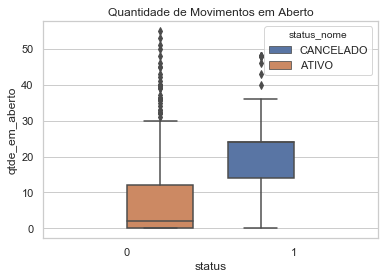

In [70]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="status", y="qtde_em_aberto", data=df, hue="status_nome").set_title('Quantidade de Movimentos em Aberto')

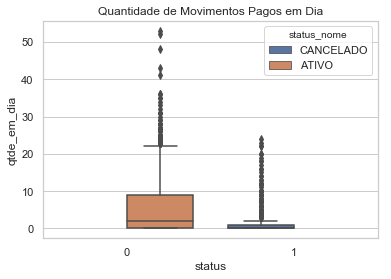

In [123]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="status", y="qtde_em_dia", data=df, hue="status_nome").set_title('Quantidade de Movimentos Pagos em Dia')

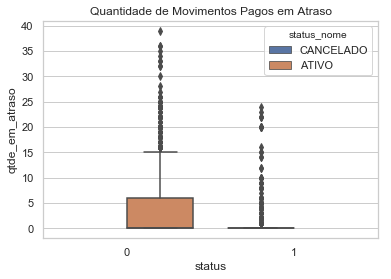

In [72]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="status", y="qtde_em_atraso", data=df, hue="status_nome").set_title('Quantidade de Movimentos Pagos em Atraso')